# Data Prediction with Python

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [13]:
try:
    df = pd.read_csv('minutes_and_certificates.csv')
except:
    print('Error while loading the file')
    
df.head()

,student_id,certificates_issued,minutes_watched
0,6,1,148.12
1,182,7,2018.87
2,801,13,6066.00
3,841,3,1623.63
4,862,1,1145.65


In [14]:
# Creating a copy of the data to avoid accidentally modifying it

data = df.copy()

data.head()

,student_id,certificates_issued,minutes_watched
0,6,1,148.12
1,182,7,2018.87
2,801,13,6066.00
3,841,3,1623.63
4,862,1,1145.65


In [15]:
# Input and Target Variables

# Input Variable (Feature): minutes_watched
# Target Variable: certificate_issued

X = df[['minutes_watched']]
y = df['certificates_issued']


# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data series into numpy arrays for compatibility with scikit-learn
x_train = X_train.to_numpy() 
x_test = X_test.to_numpy() 
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy() 

# Reshape the training data to fit the model (necessary for a single feature input)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [16]:
# Import StandardScaler.
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler.
scaler = StandardScaler()

# Fit and transform training data.
X_train_scaled = scaler.fit_transform(X_train)

# Also transform test data.
X_test_scaled = scaler.transform(X_test)

# Instantiate linear regression model.
model = LinearRegression()

In [17]:
# Fit the model to the training data.
model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# Make predictions on the testing data.
y_pred = model.predict(X_test_scaled)

In [19]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score

m = model.coef_[0]       # Slope
print(f"Slope: {m:.4f}")

b = model.intercept_     # Intercept
print(f"Intercept: {b:.4f}")

print(f"Equation: y={m:.4f}x + {b:.4f}")

# Calculate and print R^2 score.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Calculate and print MSE.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

Slope: 1.5074
Intercept: 2.5798
Equation: y=1.5074x + 2.5798
R-squared: 0.0968
Mean squared error: 13.6566
Root mean squared error: 3.6955


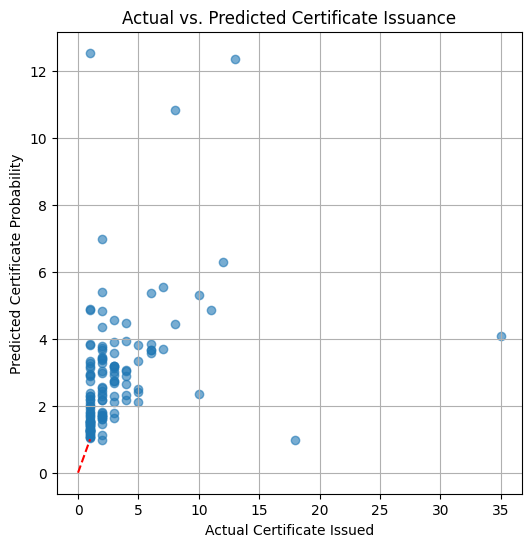

In [20]:

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line for perfect prediction
plt.xlabel('Actual Certificate Issued')
plt.ylabel('Predicted Certificate Probability')
plt.title('Actual vs. Predicted Certificate Issuance')
plt.grid(True)
plt.show()